## EDA

## Inicialización

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from scipy import stats as scipy_stats

pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', 100)  # Mostrar hasta 100 filas

## Carga de datos

In [2]:
# import data
df = pd.read_parquet('../data/raw/yellow_tripdata_2022-05.parquet', engine='pyarrow')

# Taxi Zone Lookup Table
df_zones = pd.read_excel('../data/raw/taxi_zone_lookup.xlsx')

In [3]:
# Crear función para cambiar nombres de columnas
def to_snake_case(name):
    name = name.replace(' ', '_')
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

# Rename the columns using the to_snake_case function
df.columns = [to_snake_case(col) for col in df.columns]
df_zones.columns = [to_snake_case(col) for col in df_zones.columns]

print(df.columns)
print(df_zones.columns)

Index(['vendor_id', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecode_id', 'store_and_fwd_flag',
       'pu_location_id', 'do_location_id', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'airport_fee'],
      dtype='object')
Index(['location_id', 'borough', 'zone', 'service_zone'], dtype='object')


In [4]:
# Mapeo de códigos

rate_code_mapping = {
    1: "Standard rate",
    2: "JFK",
    3: "Newark",
    4: "Nassau or Westchester",
    5: "Negocios",
    6: "Group ride",
    99: "Null/unknown"
    }

vendor_mapping = {
    1: "Creative Mobile Technologies, LLC",
    2: "Curb Mobility, LLC",
    6: "Myle Technologies Inc",
    7: "Heli Taxi"
    }

payment_mapping = {
    0: "Flex Fare trip",
    1: "Credit card",
    2: "Cash",
    3: "No charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided trip"
    }

# Mapeo de store_and_fwd_flag
store_and_fwd_mapping = {
    "Y": "Store and forward",
    "N": "Not a store and forward trip"
    }


In [5]:
# # Mapeo de columnas

# # Mapear las localizaciones de los viajes con los nombres de las distritos, zonas y zonas de servicio.
# df['pu_location_zone'] = df['pu_location_id'].map(df_zones.set_index('location_id')['zone'])
# df['do_location_zone'] = df['do_location_id'].map(df_zones.set_index('location_id')['zone'])

# df['do_location_district'] = df['do_location_id'].map(df_zones.set_index('location_id')['borough'])
# df['pu_location_district'] = df['pu_location_id'].map(df_zones.set_index('location_id')['borough'])


# df['do_location_service_zone'] = df['do_location_id'].map(df_zones.set_index('location_id')['service_zone'])
# df['pu_location_service_zone'] = df['pu_location_id'].map(df_zones.set_index('location_id')['service_zone'])

# # Verificar resultados
# df[['pu_location_id', 'pu_location_zone', 'pu_location_district', 'pu_location_service_zone', 'do_location_id', 'do_location_zone', 'do_location_district', 'do_location_service_zone']].head()

# # Mapear las columnas de ratecode_id, vendor_id y payment_type
# df['rate_code'] = df['ratecode_id'].map(rate_code_mapping)
# df['vendor'] = df['vendor_id'].map(vendor_mapping)
# df['payment_type'] = df['payment_type'].map(payment_mapping)

# # Mapear la columna store_and_fwd_flag
# df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map(store_and_fwd_mapping)

# # dropear las columnas que ya no son necesarias
# # df = df.drop(columns=['ratecode_id', 'vendor_id'])

# # Verificar resultados
# df.head()


## Analisis exploratorio

In [6]:
# Print data
df.sample(10)

,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecode_id,store_and_fwd_flag,pu_location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3316601,2,2022-05-30 17:18:28,2022-05-30 17:21:54,6.00,0.71,1.00,N,141,229,1,4.50,1.00,0.50,1.76,0.00,0.30,10.56,2.50,0.00
574402,2,2022-05-06 09:50:22,2022-05-06 10:36:14,2.00,10.13,1.00,N,186,138,1,39.50,0.00,0.50,9.87,6.55,0.30,59.22,2.50,0.00
2435038,1,2022-05-22 06:03:45,2022-05-22 06:11:03,1.00,1.10,1.00,N,230,161,1,6.00,2.50,0.50,4.00,0.00,0.30,13.30,2.50,0.00
2564563,2,2022-05-23 14:46:00,2022-05-23 14:49:34,1.00,0.55,1.00,N,237,237,1,4.50,0.00,0.50,1.00,0.00,0.30,8.80,2.50,0.00
3224943,2,2022-05-29 15:17:00,2022-05-29 15:42:43,3.00,4.83,1.00,N,68,88,1,20.00,0.00,0.50,4.66,0.00,0.30,27.96,2.50,0.00
1187494,2,2022-05-11 18:46:59,2022-05-11 19:05:41,3.00,2.50,1.00,N,229,239,1,13.00,1.00,0.50,3.46,0.00,0.30,20.76,2.50,0.00
1510510,2,2022-05-14 10:05:37,2022-05-14 10:15:37,1.00,1.51,1.00,N,238,142,1,9.00,0.00,0.50,1.50,0.00,0.30,13.80,2.50,0.00
954864,2,2022-05-09 18:04:41,2022-05-09 18:12:21,1.00,1.80,1.00,N,113,170,2,8.00,1.00,0.50,0.00,0.00,0.30,12.30,2.50,0.00
2578990,2,2022-05-23 16:37:42,2022-05-23 16:48:33,2.00,1.30,1.00,N,263,229,1,8.50,1.00,0.50,1.00,0.00,0.30,13.80,2.50,0.00
2818809,1,2022-05-25 18:28:46,2022-05-25 18:42:53,2.00,1.80,1.00,N,48,239,1,10.50,3.50,0.50,2.95,0.00,0.30,17.75,2.50,0.00


In [7]:
# Show information of the data
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3588295 entries, 0 to 3588294
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   vendor_id              3588295 non-null  int64         
 1   tpep_pickup_datetime   3588295 non-null  datetime64[us]
 2   tpep_dropoff_datetime  3588295 non-null  datetime64[us]
 3   passenger_count        3458771 non-null  float64       
 4   trip_distance          3588295 non-null  float64       
 5   ratecode_id            3458771 non-null  float64       
 6   store_and_fwd_flag     3458771 non-null  object        
 7   pu_location_id         3588295 non-null  int64         
 8   do_location_id         3588295 non-null  int64         
 9   payment_type           3588295 non-null  int64         
 10  fare_amount            3588295 non-null  float64       
 11  extra                  3588295 non-null  float64       
 12  mta_tax                35882

In [8]:
# Show descriptive statistics
df.describe()

,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecode_id,pu_location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,"3,588,295.00",3588295,3588295,"3,458,771.00","3,588,295.00","3,458,771.00","3,588,295.00","3,588,295.00","3,588,295.00","3,588,295.00","3,588,295.00","3,588,295.00","3,588,295.00","3,588,295.00","3,588,295.00","3,588,295.00","3,458,771.00","3,458,771.00"
mean,1.71,2022-05-16 07:50:29.219312,2022-05-16 08:08:42.275203,1.39,6.86,1.37,164.57,162.55,1.18,15.17,1.02,0.49,2.82,0.58,0.30,22.08,2.28,0.10
min,1.00,2003-01-01 00:06:06,2003-01-01 00:31:38,0.00,0.00,1.00,1.00,1.00,0.00,"-1,311.50",-4.50,-0.50,-145.70,-50.75,-0.30,"-1,314.80",-2.50,-1.25
25%,1.00,2022-05-08 18:14:16.500000,2022-05-08 18:32:36,1.00,1.15,1.00,132.00,113.00,1.00,7.00,0.00,0.50,1.00,0.00,0.30,12.35,2.50,0.00
50%,2.00,2022-05-16 09:14:42,2022-05-16 09:33:15,1.00,1.96,1.00,162.00,162.00,1.00,10.50,0.50,0.50,2.16,0.00,0.30,16.30,2.50,0.00
75%,2.00,2022-05-23 18:03:17,2022-05-23 18:21:03.500000,1.00,3.73,1.00,234.00,234.00,1.00,17.00,2.50,0.50,3.46,0.00,0.30,23.76,2.50,0.00
max,6.00,2022-06-01 23:55:30,2022-06-02 00:03:51,9.00,"357,192.65",99.00,265.00,265.00,4.00,"6,966.50",8.80,3.30,665.00,813.75,0.30,"6,970.80",2.75,1.25
std,0.49,NaN,NaN,0.96,690.85,5.24,65.63,70.28,0.51,14.89,1.26,0.09,3.37,2.17,0.05,18.49,0.75,0.34


In [9]:
# Verificar si hay datos duplicados
df.duplicated().sum()

0

In [10]:
# Resumen compacto de todas las columnas en una tabla
summary = pd.DataFrame({
    'Columna': df.columns,
    'Únicos': [df[col].nunique() for col in df.columns],
    'Nulos': [df[col].isna().sum() for col in df.columns],
    'Pct_Nulos': [round(df[col].isna().sum() / len(df) * 100, 2) for col in df.columns],
    'Top_Valor': [df[col].value_counts().index[0] if len(df[col]) > 0 else None for col in df.columns],
    'Top_Freq': [df[col].value_counts().values[0] if len(df[col]) > 0 else 0 for col in df.columns]
})

display(summary)

,Columna,Únicos,Nulos,Pct_Nulos,Top_Valor,Top_Freq
0,vendor_id,4,0,0.00,2,2527997
1,tpep_pickup_datetime,1754711,0,0.00,2022-05-06 19:22:00,16
2,tpep_dropoff_datetime,1752869,0,0.00,2022-05-30 00:00:00,34
3,passenger_count,10,129524,3.61,1.00,2549880
4,trip_distance,4771,0,0.00,1.00,49609
5,ratecode_id,7,129524,3.61,1.00,3256985
6,store_and_fwd_flag,2,129524,3.61,N,3404113
7,pu_location_id,259,0,0.00,132,175943
8,do_location_id,261,0,0.00,236,155644
9,payment_type,5,0,0.00,1,2720127


In [11]:
# Porcentaje de nulos (total no por columnas)
print(df.isna().sum() / len(df) * 100)

vendor_id               0.00
tpep_pickup_datetime    0.00
tpep_dropoff_datetime   0.00
passenger_count         3.61
trip_distance           0.00
ratecode_id             3.61
store_and_fwd_flag      3.61
pu_location_id          0.00
do_location_id          0.00
payment_type            0.00
fare_amount             0.00
extra                   0.00
mta_tax                 0.00
tip_amount              0.00
tolls_amount            0.00
improvement_surcharge   0.00
total_amount            0.00
congestion_surcharge    3.61
airport_fee             3.61
dtype: float64


In [12]:
# Filas con nulos
df[df.isna().any(axis=1)]

,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecode_id,store_and_fwd_flag,pu_location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3458771,2,2022-05-01 00:01:17,2022-05-01 00:18:38,NaN,4.93,NaN,None,166,163,0,23.21,0.00,0.50,2.94,0.00,0.30,29.45,NaN,NaN
3458772,2,2022-05-01 00:40:00,2022-05-01 00:50:00,NaN,1.48,NaN,None,190,97,0,10.00,0.00,0.50,2.38,0.00,0.30,13.18,NaN,NaN
3458773,1,2022-05-01 00:08:38,2022-05-01 00:28:26,NaN,3.90,NaN,None,239,234,0,16.50,0.50,0.50,4.06,0.00,0.30,24.36,NaN,NaN
3458774,2,2022-05-01 00:34:59,2022-05-01 01:12:00,NaN,13.16,NaN,None,61,151,0,43.79,0.00,0.50,10.53,0.00,0.30,57.62,NaN,NaN
3458775,2,2022-05-01 00:12:00,2022-05-01 00:25:00,NaN,4.29,NaN,None,79,262,0,17.65,0.00,0.50,3.00,0.00,0.30,23.95,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3588290,2,2022-05-31 23:40:19,2022-06-01 00:01:20,NaN,0.00,NaN,None,36,181,0,20.97,0.00,0.50,1.00,0.00,0.30,22.77,NaN,NaN
3588291,2,2022-05-31 23:52:12,2022-06-01 00:06:40,NaN,2.91,NaN,None,144,256,0,11.68,0.00,0.00,2.51,0.00,0.30,16.99,NaN,NaN
3588292,2,2022-05-31 23:27:00,2022-05-31 23:48:00,NaN,3.96,NaN,None,161,145,0,14.54,0.00,0.50,0.00,0.00,0.30,17.84,NaN,NaN
3588293,2,2022-05-31 23:34:12,2022-06-01 00:00:13,NaN,6.27,NaN,None,145,17,0,24.01,0.00,0.50,5.54,0.00,0.30,30.35,NaN,NaN


In [13]:
# Verificar códigos únicos en las columnas de pickup y dropoff tiene zonas fuera de New York
out_ny = df[df['pu_location_id'].isin([264, 265]) | df['do_location_id'].isin([264, 265])]
print(f"Total de viajes fuera de New York: {len(out_ny)}")
print(f"Porcentaje de viajes fuera de New York: {len(out_ny)/len(df)*100:.2f}%")


Total de viajes fuera de New York: 65029
Porcentaje de viajes fuera de New York: 1.81%


### Conclusión y siguientes pasos

Hemos encontrado en nuestro anilisis exploratorio que hay variables con nulos, 

- Nulos que respresentan el stos representan el 3.61% de los datos. 
- Un venddor con ID no reconocido, este se procederá a eliminar ya que son solo 14 registros.
- Hay códigos no validos para las zonas de pickup y dropoff, estos se eliminarán ya que no pertenecen a la zona de estudio, New York.


## Preprocesamiento de datos

Vamos a filtrar los registrs con vendor id igual a 5.

In [14]:
# Filtrar registros del vendor 5
df = df[df['vendor_id'] != 5]

# Verificar resultados
df['vendor_id'].value_counts()

vendor_id
2    2527997
1    1054130
6       6154
Name: count, dtype: int64

También en lo códigos de pickup y dropoff hay códigos que no pertencen a la zona de estudio, New York, estos se eliminarán.

In [15]:
# Filtrar registros fuera de New York
df = df[
    ~df['pu_location_id'].isin([264, 265]) & 
    ~df['do_location_id'].isin([264, 265])
]

# Ver que se filtraron en las columnas de pickup y dropoff
print(df['pu_location_id'].isin([264, 265]).any())
print(df['do_location_id'].isin([264, 265]).any())

False
False


In [16]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 3523252 entries, 0 to 3588294
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   vendor_id              3523252 non-null  int64         
 1   tpep_pickup_datetime   3523252 non-null  datetime64[us]
 2   tpep_dropoff_datetime  3523252 non-null  datetime64[us]
 3   passenger_count        3400957 non-null  float64       
 4   trip_distance          3523252 non-null  float64       
 5   ratecode_id            3400957 non-null  float64       
 6   store_and_fwd_flag     3400957 non-null  object        
 7   pu_location_id         3523252 non-null  int64         
 8   do_location_id         3523252 non-null  int64         
 9   payment_type           3523252 non-null  int64         
 10  fare_amount            3523252 non-null  float64       
 11  extra                  3523252 non-null  float64       
 12  mta_tax                3523252 no

Por último haremos el mapeo de códdigos de las columas vendor_id, ratecode_id, payment_type, pu_location_id y do_location_id. Además, añadiremos una columna que indique el tiempo de viaje en minutos.

In [17]:
# Mapeo de códigos

rate_code_mapping = {
    1: "Standard rate",
    2: "JFK",
    3: "Newark",
    4: "Nassau or Westchester",
    5: "Negocios",
    6: "Group ride",
    99: "Null/unknown"
    }

vendor_mapping = {
    1: "Creative Mobile Technologies, LLC",
    2: "Curb Mobility, LLC",
    6: "Myle Technologies Inc",
    7: "Heli Taxi"
    }

payment_mapping = {
    0: "Flex Fare trip",
    1: "Credit card",
    2: "Cash",
    3: "No charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided trip"
    }

In [18]:
# Mapeo de columnas

# Mapear las localizaciones de los viajes con los nombres de las distritos, zonas y zonas de servicio.
df['pu_location_zone'] = df['pu_location_id'].map(df_zones.set_index('location_id')['zone'])
df['do_location_zone'] = df['do_location_id'].map(df_zones.set_index('location_id')['zone'])

df['do_location_district'] = df['do_location_id'].map(df_zones.set_index('location_id')['borough'])
df['pu_location_district'] = df['pu_location_id'].map(df_zones.set_index('location_id')['borough'])

df['do_location_service_zone'] = df['do_location_id'].map(df_zones.set_index('location_id')['service_zone'])
df['pu_location_service_zone'] = df['pu_location_id'].map(df_zones.set_index('location_id')['service_zone'])

# Verificar resultados
df[['pu_location_id', 'pu_location_zone', 'pu_location_district', 'pu_location_service_zone', 'do_location_id', 'do_location_zone', 'do_location_district', 'do_location_service_zone']].head()

# Mapear las columnas de ratecode_id, vendor_id y payment_type
df['rate_code'] = df['ratecode_id'].map(rate_code_mapping)
df['vendor'] = df['vendor_id'].map(vendor_mapping)
df['payment_type'] = df['payment_type'].map(payment_mapping)

# Calcular tiempo de viaje en minutos
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Verificar resultados
df.head()


,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecode_id,store_and_fwd_flag,pu_location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pu_location_zone,do_location_zone,do_location_district,pu_location_district,do_location_service_zone,pu_location_service_zone,rate_code,vendor,trip_duration
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.00,4.10,1.00,N,246,151,Cash,17.00,3.00,0.50,0.00,0.00,0.30,20.80,2.50,0.00,West Chelsea/Hudson Yards,Manhattan Valley,Manhattan,Manhattan,Yellow Zone,Yellow Zone,Standard rate,"Creative Mobile Technologies, LLC",18.70
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.00,2.30,1.00,N,238,74,Cash,11.00,3.00,0.50,0.00,0.00,0.30,14.80,2.50,0.00,Upper West Side North,East Harlem North,Manhattan,Manhattan,Boro Zone,Yellow Zone,Standard rate,"Creative Mobile Technologies, LLC",13.82
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.00,4.20,1.00,N,163,260,Cash,15.50,3.00,0.50,0.00,0.00,0.30,19.30,2.50,0.00,Midtown North,Woodside,Queens,Manhattan,Boro Zone,Yellow Zone,Standard rate,"Creative Mobile Technologies, LLC",15.37
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.00,0.00,1.00,N,79,182,Credit card,41.20,0.00,0.50,0.00,0.00,0.30,42.00,0.00,0.00,East Village,Parkchester,Bronx,Manhattan,Boro Zone,Yellow Zone,Standard rate,"Creative Mobile Technologies, LLC",39.73
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.00,1.60,1.00,N,238,75,Credit card,7.50,3.00,0.50,2.25,0.00,0.30,13.55,2.50,0.00,Upper West Side North,East Harlem South,Manhattan,Manhattan,Boro Zone,Yellow Zone,Standard rate,"Creative Mobile Technologies, LLC",9.38


In [19]:
# Eliminar las columnas con id
df = df.drop(columns=['pu_location_id', 'do_location_id', 'ratecode_id', 'vendor_id'])

# Verificar resultados
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pu_location_zone,do_location_zone,do_location_district,pu_location_district,do_location_service_zone,pu_location_service_zone,rate_code,vendor,trip_duration
0,2022-05-01 00:00:36,2022-05-01 00:19:18,1.00,4.10,N,Cash,17.00,3.00,0.50,0.00,0.00,0.30,20.80,2.50,0.00,West Chelsea/Hudson Yards,Manhattan Valley,Manhattan,Manhattan,Yellow Zone,Yellow Zone,Standard rate,"Creative Mobile Technologies, LLC",18.70
1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.00,2.30,N,Cash,11.00,3.00,0.50,0.00,0.00,0.30,14.80,2.50,0.00,Upper West Side North,East Harlem North,Manhattan,Manhattan,Boro Zone,Yellow Zone,Standard rate,"Creative Mobile Technologies, LLC",13.82
2,2022-05-01 00:59:00,2022-05-01 01:14:22,1.00,4.20,N,Cash,15.50,3.00,0.50,0.00,0.00,0.30,19.30,2.50,0.00,Midtown North,Woodside,Queens,Manhattan,Boro Zone,Yellow Zone,Standard rate,"Creative Mobile Technologies, LLC",15.37
3,2022-05-01 00:48:18,2022-05-01 01:28:02,1.00,0.00,N,Credit card,41.20,0.00,0.50,0.00,0.00,0.30,42.00,0.00,0.00,East Village,Parkchester,Bronx,Manhattan,Boro Zone,Yellow Zone,Standard rate,"Creative Mobile Technologies, LLC",39.73
4,2022-05-01 00:28:26,2022-05-01 00:37:49,1.00,1.60,N,Credit card,7.50,3.00,0.50,2.25,0.00,0.30,13.55,2.50,0.00,Upper West Side North,East Harlem South,Manhattan,Manhattan,Boro Zone,Yellow Zone,Standard rate,"Creative Mobile Technologies, LLC",9.38


In [20]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 3523252 entries, 0 to 3588294
Data columns (total 24 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   tpep_pickup_datetime      3523252 non-null  datetime64[us]
 1   tpep_dropoff_datetime     3523252 non-null  datetime64[us]
 2   passenger_count           3400957 non-null  float64       
 3   trip_distance             3523252 non-null  float64       
 4   store_and_fwd_flag        3400957 non-null  object        
 5   payment_type              3523252 non-null  object        
 6   fare_amount               3523252 non-null  float64       
 7   extra                     3523252 non-null  float64       
 8   mta_tax                   3523252 non-null  float64       
 9   tip_amount                3523252 non-null  float64       
 10  tolls_amount              3523252 non-null  float64       
 11  improvement_surcharge     3523252 non-null  float64    

Ahora que tenemos las columnas con las categorías, procedemremos a hacer un análisis más profundo de las variables.

## Análisis de datos

### Análisis de variables numéricas

In [21]:
# Determinando las columnas de tipo integer y float

numeric_columns = [
    'passenger_count',
    'trip_distance',
    'fare_amount',
    'extra',
    'mta_tax',
    'improvement_surcharge',
    'tolls_amount',
    'total_amount',
    'congestion_surcharge',
    'tip_amount',
    'trip_duration'
    ]

categorical_columns = [
    'vendor',
    'rate_code',
    'payment_type',
    'pu_location_zone',
    'pu_location_district',
    'pu_location_service_zone',
    'do_location_zone',
    'do_location_district',
    'do_location_service_zone',
    'store_and_fwd_flag',
    ]

In [24]:
df.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration
count,3523252,3523252,"3,400,957.00","3,523,252.00","3,523,252.00","3,523,252.00","3,523,252.00","3,523,252.00","3,523,252.00","3,523,252.00","3,523,252.00","3,400,957.00","3,400,957.00","3,523,252.00"
mean,2022-05-16 07:49:10.265044,2022-05-16 08:07:14.118788,1.39,6.77,14.75,1.03,0.49,2.78,0.55,0.30,21.61,2.30,0.10,18.06
min,2003-01-01 00:06:06,2003-01-01 00:31:38,0.00,0.00,"-1,311.50",-4.50,-0.50,-89.96,-47.00,-0.30,"-1,314.80",-2.50,-1.25,-14.08
25%,2022-05-08 18:15:07.750000,2022-05-08 18:33:11.500000,1.00,1.15,7.00,0.00,0.50,1.00,0.00,0.30,12.35,2.50,0.00,7.67
50%,2022-05-16 09:06:22,2022-05-16 09:25:16,1.00,1.94,10.50,0.50,0.50,2.16,0.00,0.30,16.00,2.50,0.00,12.65
75%,2022-05-23 18:03:18.250000,2022-05-23 18:21:02,1.00,3.67,16.50,2.50,0.50,3.45,0.00,0.30,23.30,2.50,0.00,20.43
max,2022-06-01 23:55:30,2022-06-02 00:03:51,9.00,"357,192.65","6,966.50",8.80,3.30,408.00,813.75,0.30,"6,970.80",2.75,1.25,"6,823.55"
std,NaN,NaN,0.96,687.46,13.57,1.26,0.09,3.18,2.08,0.05,17.14,0.72,0.34,51.45


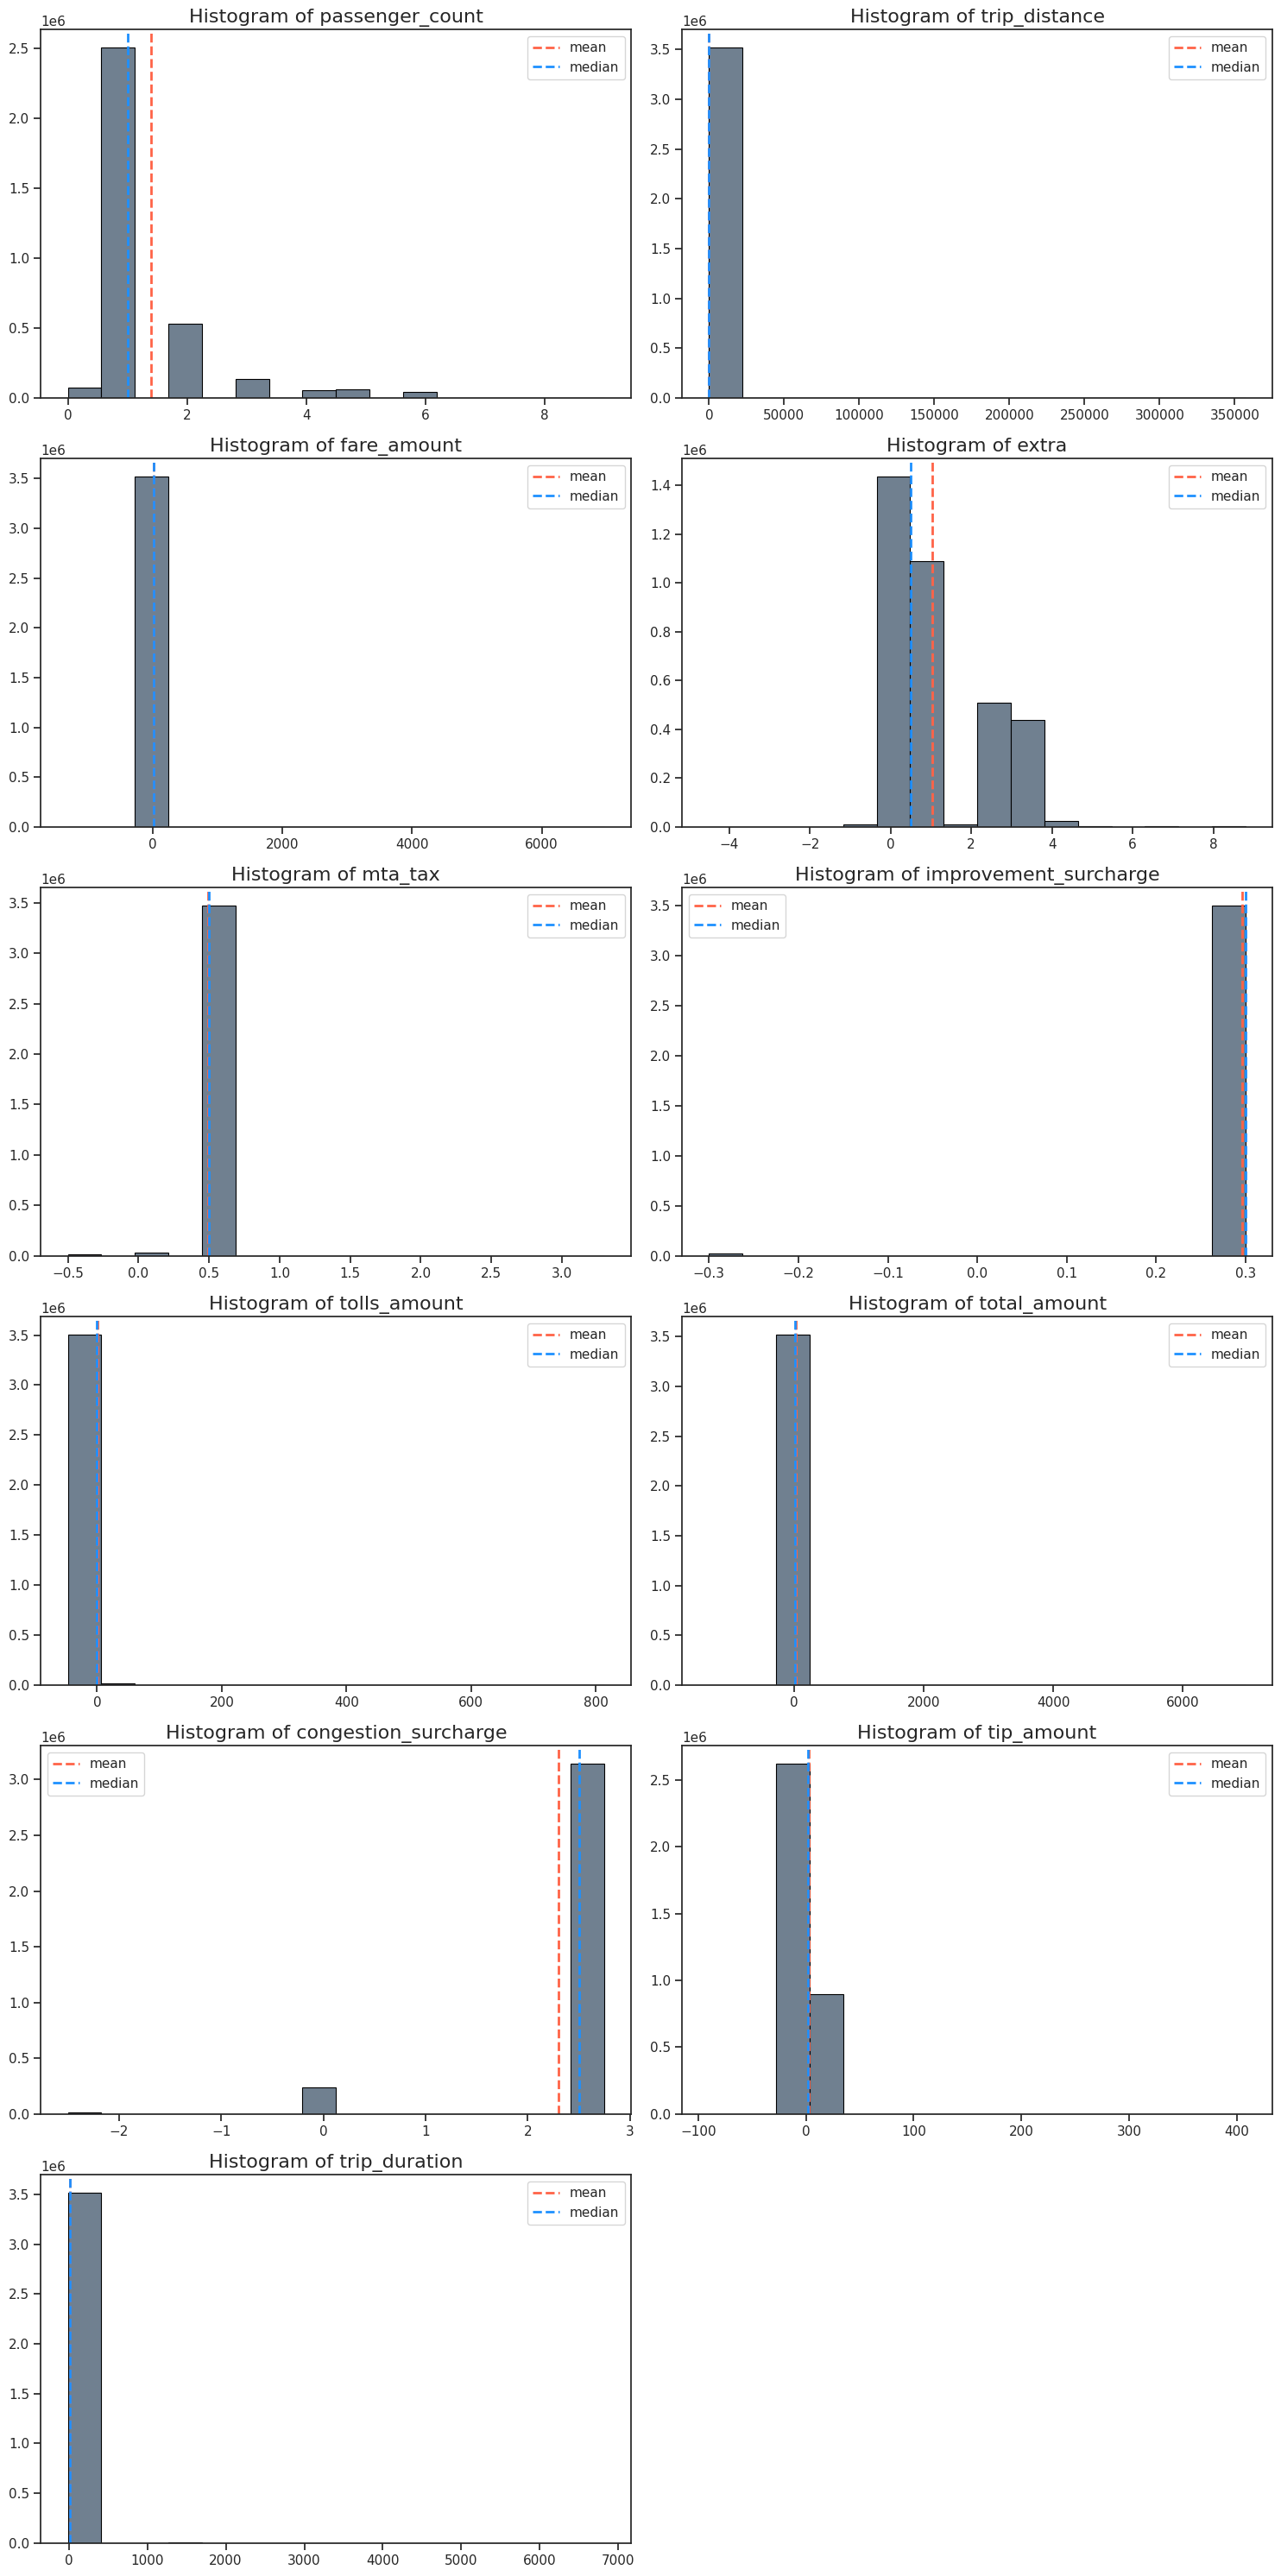

In [22]:
sns.set(style="ticks")

num_vars = len(numeric_columns)
num_rows = num_vars // 2  # assuming we want 2 plots per row
num_rows += num_vars % 2  # add an extra row if there are leftovers

# create the subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))  # Change the size as you see fit.

# flatten the axes array, so we can easily iterate over it
axes = axes.flatten()

# iterate over your numeric columns and plot a histogram on the corresponding axes
for i, col in enumerate(numeric_columns):
    axes[i].hist(df[col], bins=16, color='slategray', edgecolor="black", linewidth=0.8)
    
    # Draw vertical lines for mean and median
    mean_val = df[col].mean()
    median_val = df[col].median()
    mean_line = axes[i].axvline(mean_val, color='tomato', linestyle='dashed', linewidth=2)
    median_line = axes[i].axvline(median_val, color='dodgerblue', linestyle='dashed', linewidth=2)
    
    # Add legend
    axes[i].legend([mean_line, median_line], ['mean', 'median'])
    axes[i].set_title(f'Histogram of {col}', fontsize=16)
    
# remove the unused subplots
if len(numeric_columns) % 2:
    for j in range(i+1, num_rows*2):
        fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

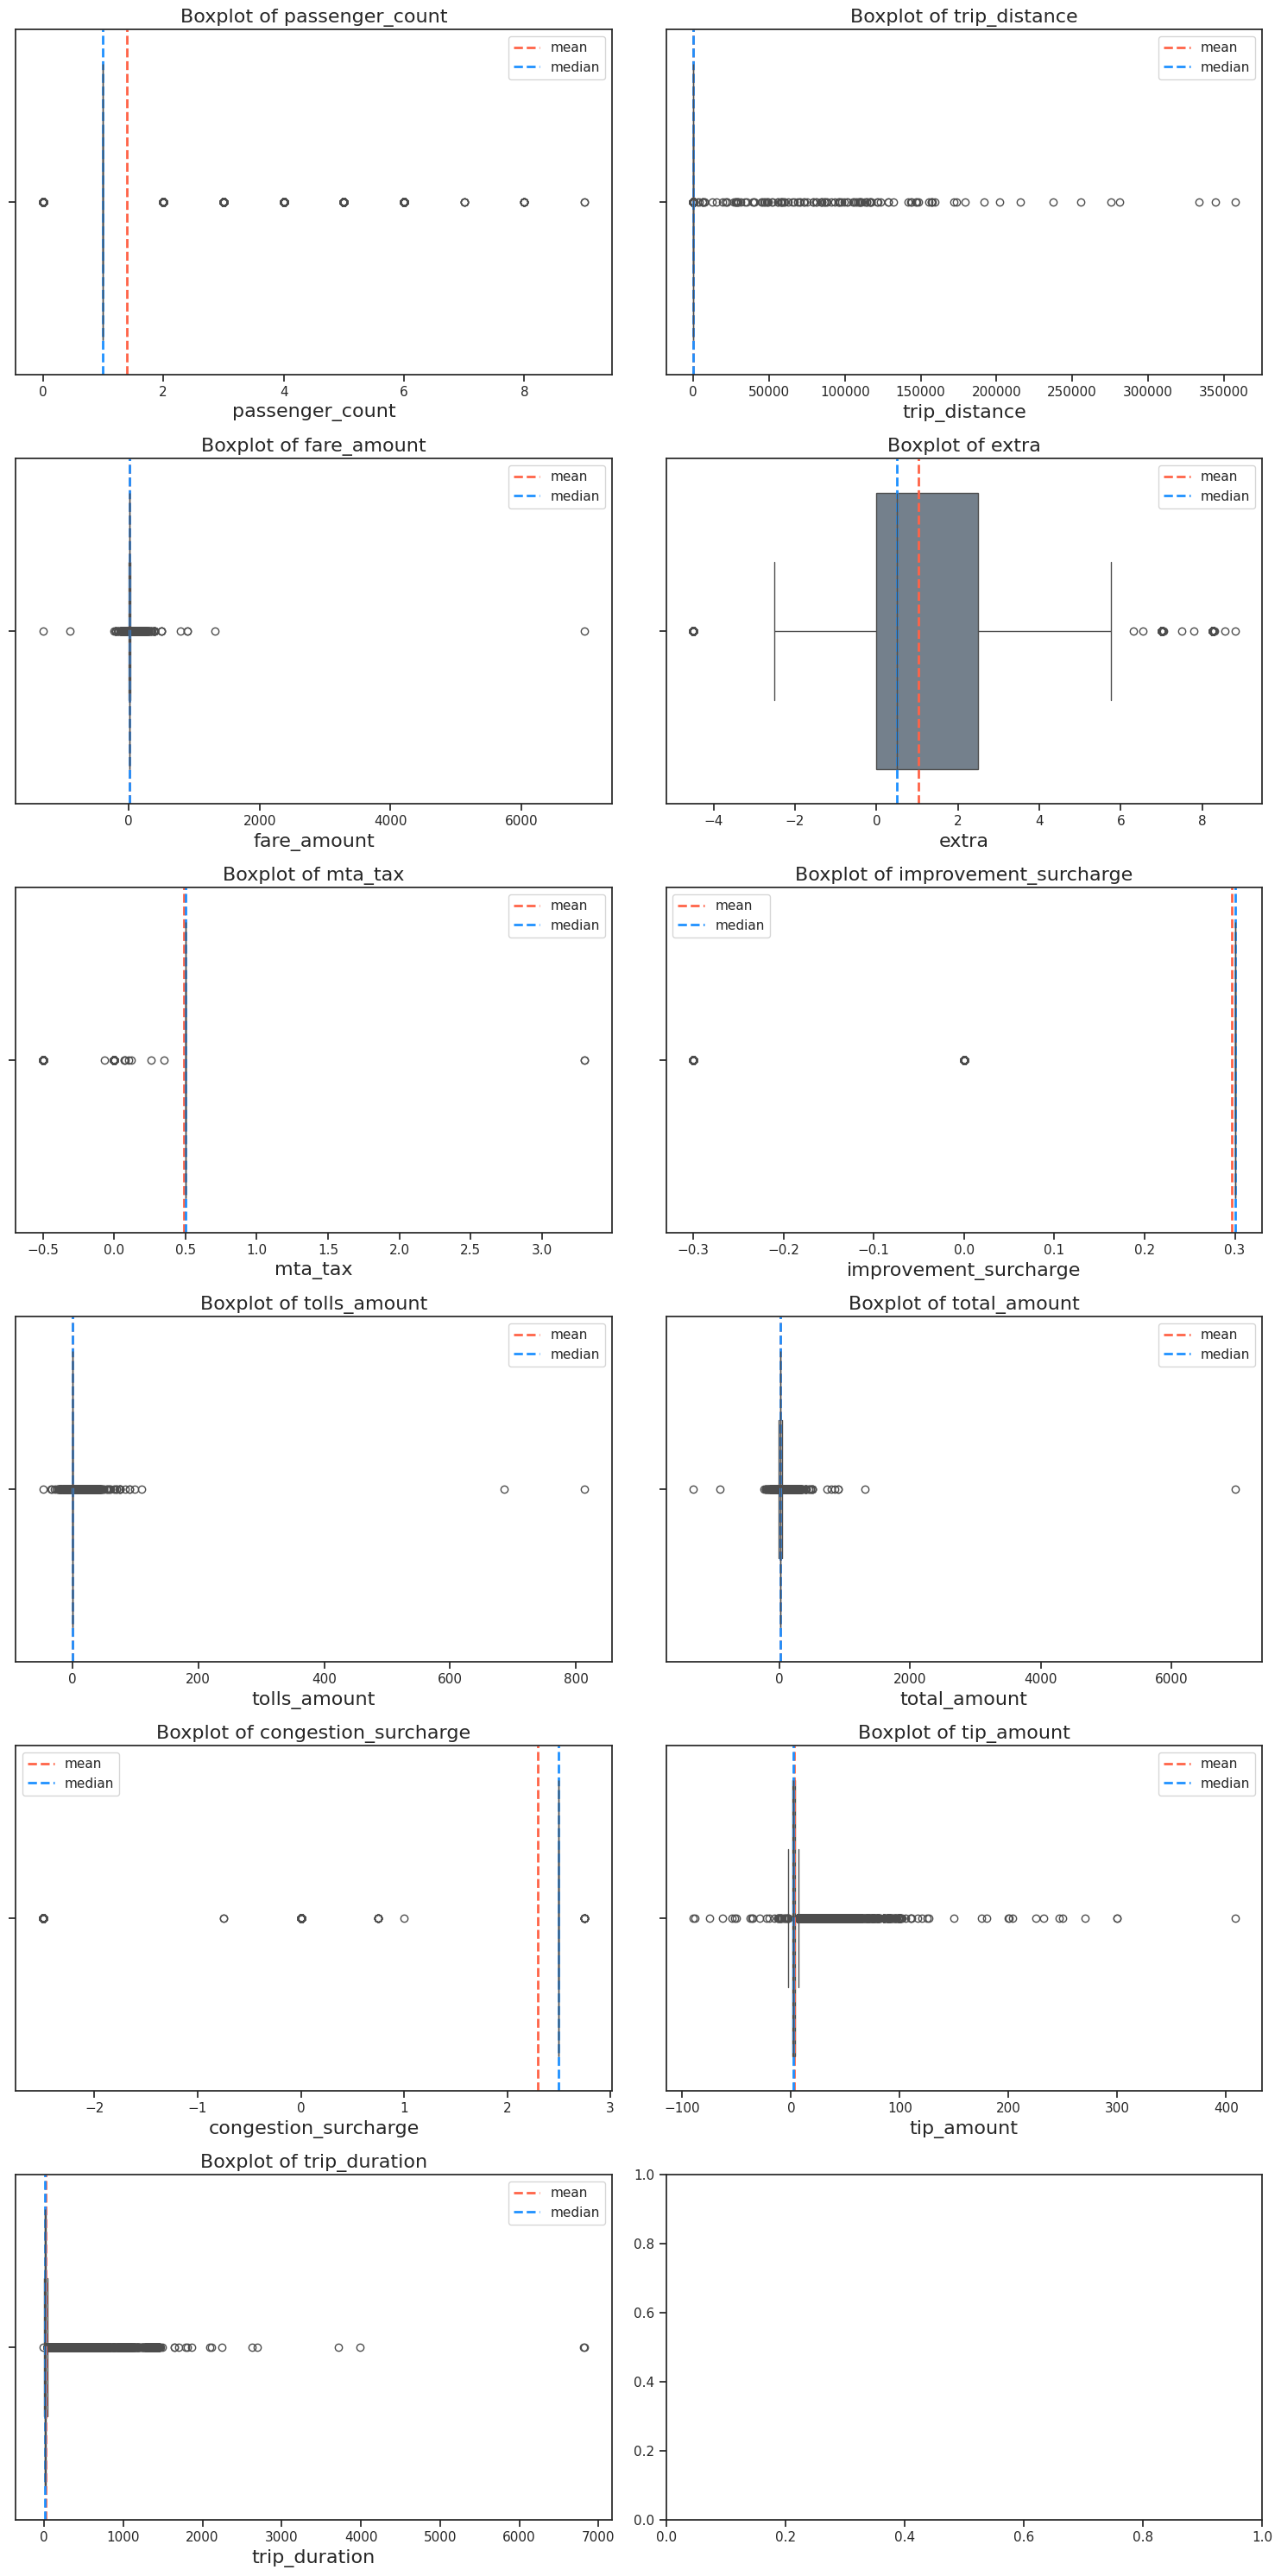

In [23]:
sns.set(style="ticks")

num_vars = len(numeric_columns)
num_rows = num_vars // 2  # assuming we want 2 plots per row
num_rows += num_vars % 2  # add an extra row if there are leftovers

# create the subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))

# flatten the axes array, so we can easily iterate over it
axes = axes.flatten()

# iterate over your numeric columns and plot a box plot on the corresponding axes
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], color='slategray', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=20, weight='bold')
    axes[i].set_xlabel(col, fontsize=16)
    
    # Draw vertical lines for mean and median
    mean_val = df[col].mean()
    median_val = df[col].median()
    mean_line = axes[i].axvline(mean_val, color='tomato', linestyle='dashed', linewidth=2)
    median_line = axes[i].axvline(median_val, color='dodgerblue', linestyle='dashed', linewidth=2)

    # Add legend
    axes[i].legend([mean_line, median_line], ['mean', 'median'])
    axes[i].set_title(f'Boxplot of {col}', fontsize=16)
    
plt.tight_layout()
plt.show()

Viendo los boxplots e histogramas, podemos observar que los datos en varias varibales no son simétricos, es decir hay muchos outliers. Los casos más extremos se ven en la distancia de los viajes, donde hay viajes de más de 100 millas y el tiempo de viaje, donde hay viajes de más de 3 horas. Ahora veamos la correlación entre las variables numéricas.

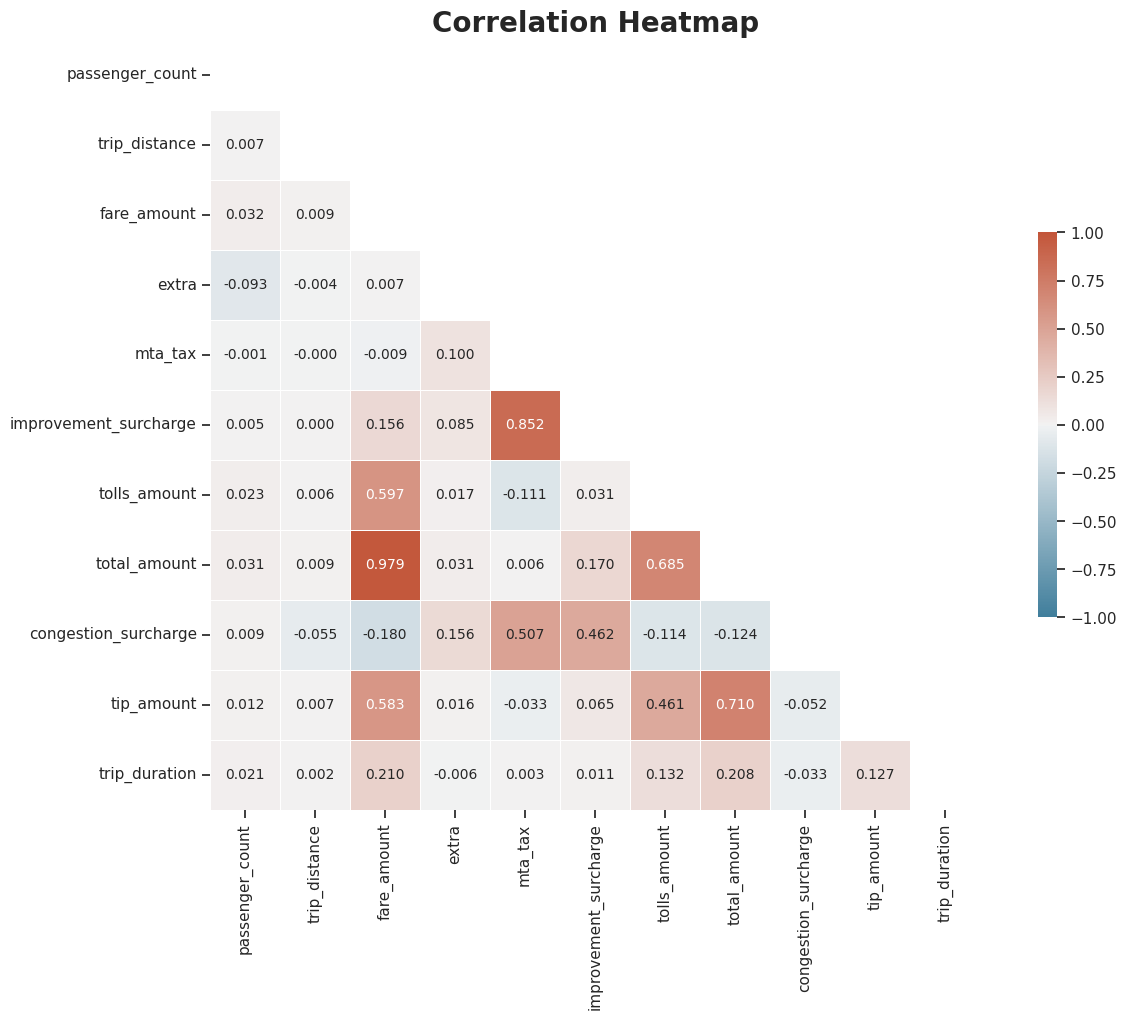

In [25]:
# Calculate the correlation matrix
import numpy as np
corr = df[numeric_columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, annot=True, fmt=".3f", annot_kws={'size': 10},
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add a title to the heatmap
plt.title('Correlation Heatmap', fontsize=20, fontweight='bold')

# Display the heatmap
plt.show()

Como se suponía los costos de los viajes son las variables más relacionadas entre si. Por otro lado, no se muestra una relación fuerte entre el tiempo de viaje y el costo del viaje.

### Anáisis de variables categóricas

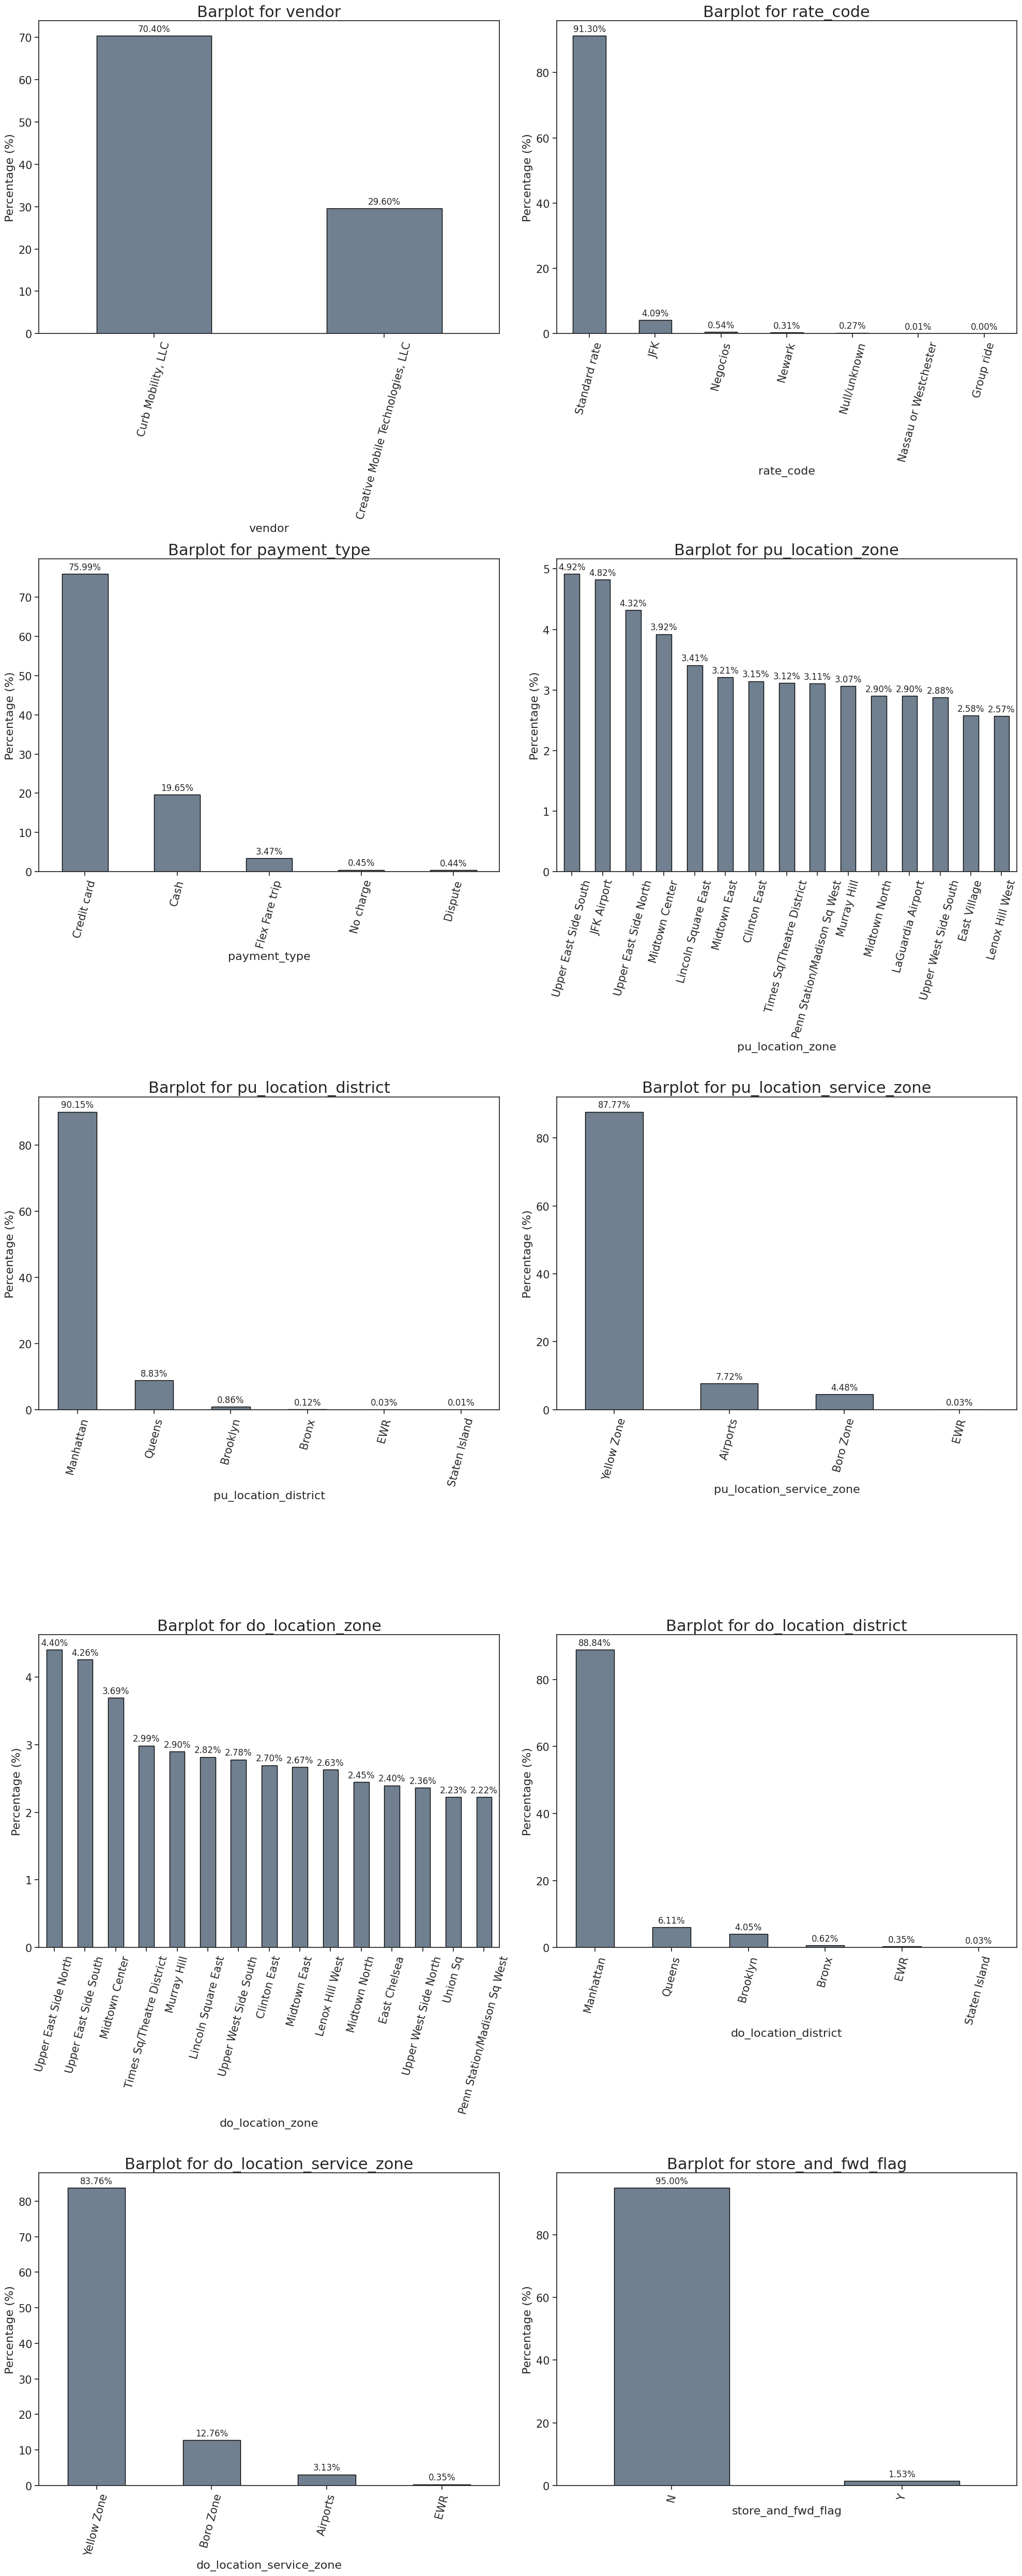

In [28]:
# set the seaborn style
sns.set(style="ticks")

# determine the number of rows needed for our subplots
num_vars = len(categorical_columns)
num_rows = num_vars // 2
num_rows += num_vars % 2

# create the subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows*10))
axes = axes.flatten()

total_records = len(df)

for i, column in enumerate(categorical_columns):
    column_counts = df[column].value_counts().nlargest(15)
    column_percentages = (column_counts / total_records * 100)
    
    # Crear gráfico de barras con porcentajes
    bars = column_percentages.plot(kind='bar', ax=axes[i], color="slategray", edgecolor='black')
    
    axes[i].set_title(f'Barplot for {column}', fontsize=22)
    axes[i].set_xlabel(column, fontsize=16)
    axes[i].set_ylabel('Percentage (%)', fontsize=16)
    axes[i].tick_params(axis='x', rotation=75, labelsize=15)
    axes[i].tick_params(axis='y', labelsize=15)
    
    # Añadir los valores de porcentaje sobre cada barra
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.2f%%', fontsize=12, padding=3)

plt.tight_layout()
plt.show()

Respecto a al columnas categóricas, este es lo que se puede observar:
- **vendor**: El vendor más común es Creative Mobile Technologies, LLC con alrededor de 70% de los viajes.
- **rate_code**: La tarifa más común es la estándar (70% de los viajes aprox), la segunda más común es la de JFK (5% de los viajes aprox).
- **payment_type**: El tipo de pago más común es es el credit card con alrededor de 80% de los viajes y la segunda más común es el cash con alrededor de 15% de los viajes.
- **pu_location_district**: Manhattan concentra más del 85% de los pickups.
- **pu_location_service_zone**: Yellow Zone representa más del 85% de los pickups y la segunda más común son loas aereopuertos (~7%).
- **do_location_district**: Manhattan concentra más del 85% de los dropoffs
- **do_location_service_zone**: Patrón similar a pickups, Yellow Zone domina con ~80% y Boro zone es la siguiente con ~12%.
- **store_and_fwd_flag**: la categoría "N" (No) representa más del 95% de los viajes.


Ahora mostraremos un gráfico de pares  para mostrar la relación entre las variables.

In [ ]:
# Graficar gráfico de pares
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

### Conclusiones y siguientes pasos

## Procesamiento de datos

### Tratamiento de valores ausentes

Lo primero que derteminaremos es si estos valores ausentes son independientes o no.

In [ ]:
df[df.isna().any(axis=1)]

In [ ]:
# Cantidad de nulos
df.isnull().sum() / len(df) * 100

In [ ]:
# Columnas con nulos
cols_con_nulos = df.columns[df.isna().any()].tolist()

# Verificación final: ¿Cuando una es nula, TODAS son nulas?
print("\n Verificación: ¿Cuando falta una, faltan todas?")
print("-" * 70)

# Tomar la primera columna como referencia
col_referencia = cols_con_nulos[0]
registros_nulos_ref = df[col_referencia].isna()

# Verificar si coincide con las demás
todas_coinciden = True
for col in cols_con_nulos[1:]:
    coinciden = (df[col].isna() == registros_nulos_ref).all()
    simbolo = "✅" if coinciden else "❌"
    print(f"{simbolo} {col_referencia} vs {col}: {'Coinciden 100%' if coinciden else 'NO coinciden'}")
    if not coinciden:
        todas_coinciden = False


Al parecer, los nulos son independientes. Es decir los nulos coinciden en las mismas filas. Ahora procederemos a buscar la causa común de los nulos, para ello compararemos los valores de las columnas categóricas de las filas con nulos con las mismas columnas de las filas sin nulos.

In [ ]:
# Crear máscara de registros con nulos (usar cualquier columna, son las mismas)
tiene_nulos = df['passenger_count'].isna()


# Campos categóricos clave a investigar
campos_investigar = ['vendor', 'payment_type', 'rate_code', 'store_and_fwd_flag']

for campo in campos_investigar:
    print(f"\n🔍 Campo: {campo}")
    print("-" * 70)
    
    # Ver valores únicos en registros CON nulos
    valores_en_nulos = df[tiene_nulos][campo].value_counts(dropna=False)
    
    # Comparar
    print(f"Valores en registros CON nulos:")
    print(valores_en_nulos)
    
    # TEST CLAVE: ¿Algún valor tiene 100% de nulos?
    print(f"\n% de nulos por cada valor de {campo}:")
    for valor in df[campo].dropna().unique():
        registros_con_este_valor = df[campo] == valor
        nulos_en_este_valor = (df[registros_con_este_valor]['passenger_count'].isna()).sum()
        total_este_valor = registros_con_este_valor.sum()
        pct = (nulos_en_este_valor / total_este_valor * 100) if total_este_valor > 0 else 0
        
        if pct == 100.0:
            print(f"   {valor}: {pct:.1f}% ⚠️ ¡TODOS los registros tienen nulos!")
        elif pct > 50:
            print(f"   {valor}: {pct:.1f}% ⚠️")
        elif pct > 0:
            print(f"   {valor}: {pct:.1f}%")
        else:
            print(f"   {valor}: {pct:.1f}%")


Hemos encontrado que todos los registros nulos son del tipo de pago Flex Fare trip (0), este tipo de pago es relacionado a taxis por aplicativo. Por otro lado, tenemos dos vendors que tienen un 100% de nulos, Creative Mobile Technologies, LLC y Curb Mobility, LLC (relacionado con apps de taxis).

In [ ]:
# Filtrar registros con payment_type = 0
df_flex = df[df['payment_type'] == 0]

df_flex.describe()

In [ ]:
# Filtrar payment_type = 0
df = df[df['payment_type'] != "Flex Fare trip"]

df['payment_type'].value_counts()

### Tratamiento de outliers

##### Trip Distance

Pasemos a estudiar la columna trip_distance.

In [ ]:
# Verificar datos estadísticos de la columna trip_distance
df['trip_distance'].describe()


Como podemos observar, el boxplot muestra que hay varios viajes con distancias atípicas. Esto puede ser porque hay viajes que no son dentro de New York, por lo que se procederá a eliminar estos viajes. Veamos el contenido completo de los valores con la frecuencia de ocurrencia.

In [ ]:
# Value counts con distancias redondeadas (sin decimales)
distancias_redondeadas = df['trip_distance'].round(0).astype(int)
value_counts = distancias_redondeadas.value_counts().sort_index(ascending=False)

print(f"{'Distancia (mi)':>15}  {'Cantidad':>10}")
print("="*30)

for distancia, cantidad in value_counts.items():
    print(f"{distancia:>15}  {cantidad:>10,}")

In [ ]:
sns.set(style="ticks")

# Definir las "columnas numéricas" a graficar (específico para estos dos subplots)
hist_columns = [
    'trip_distance',  # Histograma completo
    'trip_distance_zoom',  # Histograma para <= 50 millas (agregada como serie temporal)
]

# Crear una columna temporal para el zoom
df['trip_distance_zoom'] = df['trip_distance'].where(df['trip_distance'] <= 50)

num_vars = len(hist_columns)
num_rows = num_vars // 2
num_rows += num_vars % 2

fig, axes = plt.subplots(num_rows, 2, figsize=(16, num_rows * 7))
axes = axes.flatten()

for i, col in enumerate(hist_columns):
    # Seleccionar la serie (filtrado para la columna de zoom)
    if col == 'trip_distance_zoom':
        data = df['trip_distance_zoom'].dropna()
        hist_title = 'Distribución (≤50 millas)'
    else:
        data = df['trip_distance']
        hist_title = 'Distribución Completa'
    
    # Escala log solo en el histograma completo
    if col == 'trip_distance':
        axes[i].hist(data, bins=100, color='slategray', edgecolor="black", linewidth=0.8)
        axes[i].set_yscale('log')
    else:
        axes[i].hist(data, bins=100, color='slategray', edgecolor="black", linewidth=0.8)
    
    axes[i].set_title(hist_title)
    axes[i].set_xlabel('Distancia (millas)')
    axes[i].set_ylabel('Frecuencia')
    
    mean_val = data.mean()
    median_val = data.median()
    mean_line = axes[i].axvline(mean_val, color='tomato', linestyle='dashed', linewidth=2)
    median_line = axes[i].axvline(median_val, color='dodgerblue', linestyle='dashed', linewidth=2)
    
    print(f'{hist_title}:')
    print(f'Median: {median_val}')
    print(f'Mean: {mean_val}')
    print()
    axes[i].legend([mean_line, median_line], ['mean', 'median'])
    
# Remover subgráficos no usados
for j in range(i+1, num_rows*2):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Eliminar la columna auxiliar para no dejar basura en el DataFrame
df.drop(columns=['trip_distance_zoom'], inplace=True, errors='ignore')

Como se puede observar, hay una cola larga a la derecha, lo cual indica que hay una asimetría en la distribución, la concentración de datos se encuentra en las distancias cortas. Además, se puede observar que hay un salto en la distancia de 50 millas, lo cual sugiere que hay un umbral para la distancia de los viajes. Comprobemos esto midiendo el skewness y el kurtosis.

In [ ]:
skewness = scipy_stats.skew(df['trip_distance'])
kurtosis = scipy_stats.kurtosis(df['trip_distance'])

print(f"  Skewness (asimetría):  {skewness:.2f}")
print(f"  Kurtosis (curtosis):   {kurtosis:.2f}")

El skewness indica que la distribución es asimétrica a la derecha (skewness > 0), lo cual es consistente con la observación de la cola larga en el histograma. El kurtosis es muy alto, lo cual indica que la distribución es muy puntiaguda (concentrada) y tiene muchos outliers.

Sabiendo esto sabemos que no podemos usar métodos que asumen normalidad, como el Z-score, ya que la distribución no es normal. Por otro lado, los métodos robustos como el MAD y los percentiles son más adecuados para detectar outliers.

Validaremos los umbrales de los métodos robustos para detectar outliers segun la distrubución atípica de la distancia de los viajes. Usaremos los métodos IQR, MAD y percentiles para validar los umbrales.

In [ ]:

# Método 1: IQR
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1
umbral_iqr = Q3 + 1.5 * IQR

# Método 2: MAD
mediana = df['trip_distance'].median()
mad = scipy_stats.median_abs_deviation(df['trip_distance'])
umbral_mad = mediana + (3.5 * mad / 0.6745)

# Método 3: Percentiles
umbrales_percentiles = {
    '99.0%': df['trip_distance'].quantile(0.990),
    '99.5%': df['trip_distance'].quantile(0.995),
    '99.9%': df['trip_distance'].quantile(0.999),
}

# Tabla comparativa
print(f"\n{'Método':<20} {'Umbral':>12} {'N Outliers':>12} {'% Outliers':>12}")
print("-"*60)

metodos = {
    'IQR (Q3+1.5*IQR)': umbral_iqr,
    'MAD (Med+3.5*MAD)': umbral_mad,
    **umbrales_percentiles
}

for nombre, umbral in metodos.items():
    n_outliers = (df['trip_distance'] > umbral).sum()
    pct = (n_outliers / len(df)) * 100
    print(f"{nombre:<20} {umbral:>10.2f} mi {n_outliers:>10,}   {pct:>10.2f}%")

Como se puedo observar el método menos agresivo es usanod percentiles y va de la mano con la lógica con la distacia máxima que podria tener un viaje en la ciudad de Nueva York. Hagamos un análisis más profundo con los percentiles para establcer el más adecuado.

In [ ]:
# Probar rangos cercanos
percentiles_test = [99.0, 99.5, 99.8, 99.9, 99.95, 99.99]

print(f"\n{'Percentil':<12} {'Umbral':>10} {'Elimina':>10} {'%':>8}")
print("-"*45)

for p in percentiles_test:
    umbral = df['trip_distance'].quantile(p/100)
    n_elimina = (df['trip_distance'] > umbral).sum()
    pct = (n_elimina / len(df)) * 100
    print(f"{p:>6.2f}%    {umbral:>8.2f} mi {n_elimina:>8,}   {pct:>6.3f}%")


El más adecuado es el percentil 99.95%, ya que elimina alrededor de 0.05% de los datos (1,734 registros), lo cual es muy poco y abarcar los viajes con distancias reales dentro de New York. Por lo tanto, usaremos este umbral para eliminar los outliers.

In [ ]:
# Filtrar outliers
umbral = df['trip_distance'].quantile(0.9995)
df = df[df['trip_distance'] <= umbral]

# Verificar resultados
print(f"\nTotal de viajes después de eliminar outliers: {len(df):,}")

In [ ]:
df['trip_distance'].describe()

In [ ]:
# Graficar histograma de una columna específica
sns.set(style="ticks")

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Limite
limit = 10

# Crear histograma
ax.hist(df['trip_distance'], bins=100, color='slategray', edgecolor="black", linewidth=0.8)

# Dibujar líneas para media y mediana
mean_val = df['trip_distance'].mean()
median_val = df['trip_distance'].median()
mean_line = ax.axvline(mean_val, color='tomato', linestyle='dashed', linewidth=2)
median_line = ax.axvline(median_val, color='dodgerblue', linestyle='dashed', linewidth=2)

# Imprimir estadísticas
print(f'trip_distance:')
print(f'Median: {median_val}')
print(f'Mean: {mean_val}')

# Añadir leyenda
ax.legend([mean_line, median_line], ['mean', 'median'])
ax.set_title(f'Histogram of trip_distance', fontsize=16)
ax.set_xlabel('trip_distance')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Boxplot de trip_distance

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['trip_distance'])
plt.title('Boxplot of trip_distance')
plt.ylabel('Trip Distance')
plt.show()

In [ ]:
# Value count ordenado por distancia (ordenar por valor/distancia, no por frecuencia)
df['trip_distance'].value_counts().sort_index(ascending=False)


In [ ]:
zero_distance_trips = df[df['trip_distance'] == 0]
zero_distance_trips.head()

In [ ]:
# Porcentaje de viajes con distancia 0
zero_distance_trips.shape[0] / len(df) * 100

In [ ]:
sns.set(style="ticks")

num_vars = len(numeric_columns)
num_rows = num_vars // 2  # assuming we want 2 plots per row
num_rows += num_vars % 2  # add an extra row if there are leftovers

# create the subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))  # Change the size as you see fit.

# flatten the axes array, so we can easily iterate over it
axes = axes.flatten()

# iterate over your numeric columns and plot a histogram on the corresponding axes
for i, col in enumerate(numeric_columns):
    axes[i].hist(zero_distance_trips[col], bins=16, color='slategray', edgecolor="black", linewidth=0.8)
    
    # Draw vertical lines for mean and median
    mean_val = zero_distance_trips[col].mean()
    median_val = zero_distance_trips[col].median()
    mean_line = axes[i].axvline(mean_val, color='tomato', linestyle='dashed', linewidth=2)
    median_line = axes[i].axvline(median_val, color='dodgerblue', linestyle='dashed', linewidth=2)
    
    # Add legend
    axes[i].legend([mean_line, median_line], ['mean', 'median'])
    axes[i].set_title(f'Histogram of {col}', fontsize=16)
    
# remove the unused subplots
if len(numeric_columns) % 2:
    for j in range(i+1, num_rows*2):
        fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

Ya que los viajes con distacia zero representan solo el 1% aproximadamente, los eliminaremos.

In [ ]:
df = df[df['trip_distance'] > 0]
df.info(show_counts=True)

In [ ]:
# Ver distancias únicas ordenadas de mayor a menor
distancias_ordenadas = df['trip_distance'].sort_values(ascending=False).drop_duplicates().reset_index(drop=True)

# Mostrar las primeras 100 para ver dónde está el salto
print("Top 100 distancias únicas (de mayor a menor):")
print("="*60)
print(f"{'#':<5} {'Distancia':<15} {'Frecuencia':<12}")
print("-"*60)

for i in range(min(200, len(distancias_ordenadas))):
    dist = distancias_ordenadas[i]
    freq = (df['trip_distance'] == dist).sum()
    print(f"{i+1:<5} {dist:<15.2f} {freq:<12}")

### Tratamiento de outliers

Ahora procederemos a estudiar los outliers de las columnas trip_distance, fare_amount, total_amount y tip_amount.